[*********************100%***********************]  1 of 1 completed


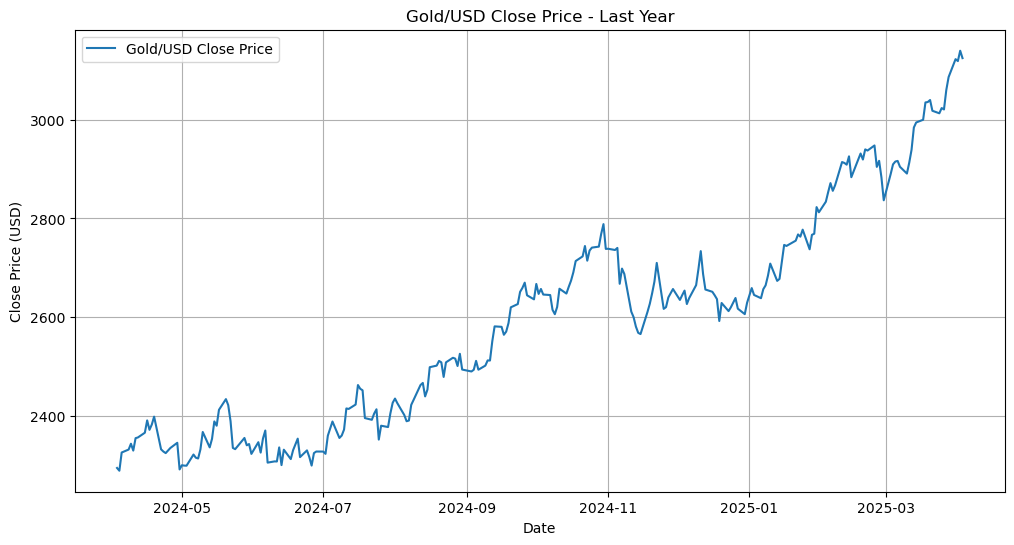

In [52]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta,datetime,date
import pandas as pd
import numpy as np
import time
from IPython.display import clear_output

symbol = "GC=F" # Gold Futures symbol on Yahoo Finance
# Fetch historical data for Gold/USD (last year)
df = yf.download(symbol, period="1y", interval="1d")
df.index = df.index.tz_localize('UTC')  # Localize the index to UTC

# Check if data is fetched successfully
if not df.empty:
    # Plot close price
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Gold/USD Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title('Gold/USD Close Price - Last Year')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No data fetched for the given symbol.")

[*********************100%***********************]  1 of 1 completed


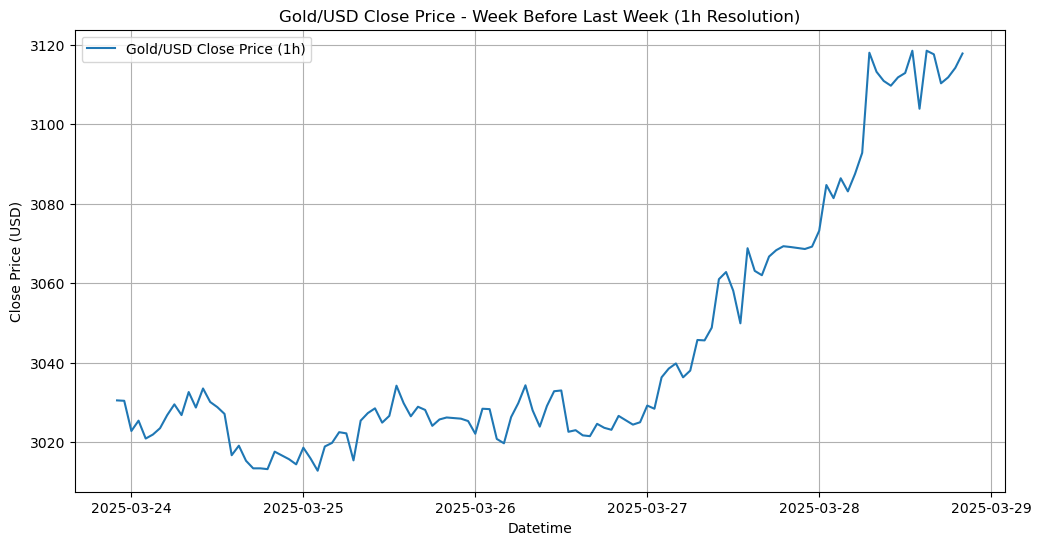

In [53]:
from datetime import datetime, timedelta

# Calculate the start and end dates for the week before the last week
# end_date = datetime.now() - timedelta(days=7)  # End of the last week
# start_date = end_date - timedelta(days=7)  # Start of the week before the last week
# start_date_input = start_date.strftime('%Y-%m-%d')
# end_date_input = end_date.strftime('%Y-%m-%d')

start_date_input = '2025-03-23'
end_date_input = '2025-03-30'



# Fetch historical data for the week before the last week with 1-hour resolution
df_prev_week = yf.download(symbol, start=start_date_input, end=end_date_input, interval="1h")


# Plot close price for the week before the last week with 1-hour resolution
plt.figure(figsize=(12, 6))
plt.plot(df_prev_week.index, df_prev_week['Close'], label='Gold/USD Close Price (1h)')
plt.xlabel('Datetime')
plt.ylabel('Close Price (USD)')
plt.title('Gold/USD Close Price - Week Before Last Week (1h Resolution)')
plt.legend()
plt.grid()
plt.show()

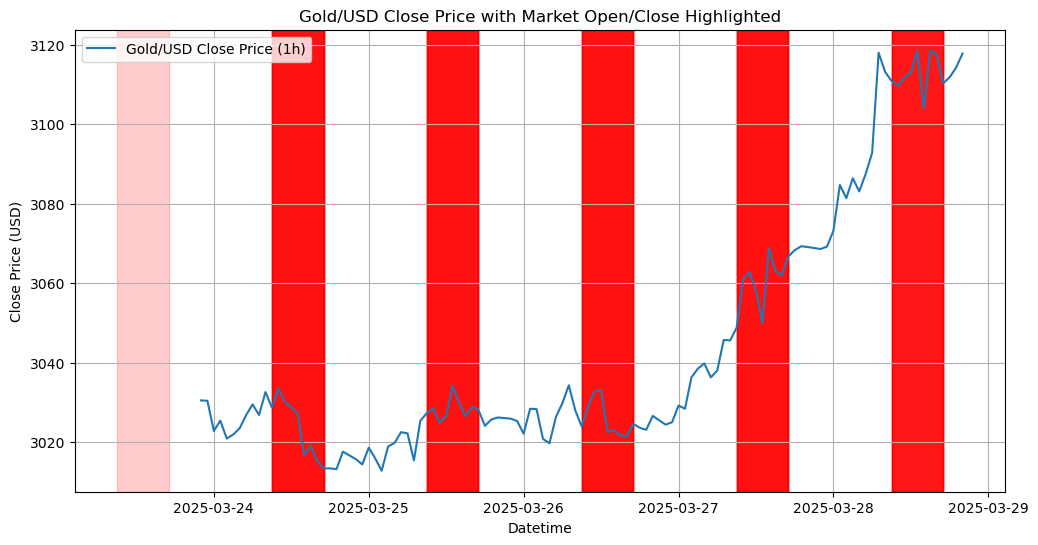

In [54]:
df_1h = df_prev_week.copy()
day_close_price = dict()
# Define market open and close times in UTC
market_open_utc = timedelta(hours=9)  # 9 AM
market_close_utc = timedelta(hours=17) # 5 PM

# Plot the close price
plt.figure(figsize=(12, 6))
plt.plot(df_1h.index, df_1h['Close'], label='Gold/USD Close Price (1h)')

# Highlight market open and close times
for date in df_1h.index.date:
    open_time = pd.Timestamp(date) + market_open_utc
    close_time = pd.Timestamp(date) + market_close_utc
    plt.axvspan(open_time, close_time, color='red', alpha=0.1)
    # Filter rows for the specific date
    daily_data = df_1h[df_1h.index.date == date]
    day_close_price[date] = {"open_time": open_time , "day_close" :daily_data.iloc[-1]['Close'][symbol] , "close_time": close_time}
    
# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Close Price (USD)')
plt.title('Gold/USD Close Price with Market Open/Close Highlighted')
plt.legend()
plt.grid()
plt.show()


In [55]:
#get the level for each day
day_levels = {}

for date, obj in day_close_price.items():
    if date in day_close_price:
        previous_day = date - timedelta(days=1)
        if previous_day in day_close_price:
            trade_level = day_close_price[previous_day]['day_close']
            day_levels[date] = {
                "open_time": obj['open_time'],
                "trade_level": trade_level,
                "close_time": obj["close_time"],
            }



print("Day Close Price Dictionary:")
for date, close_price in day_close_price.items():
    print(f"{date}: {close_price}")


print("Day Levels Dictionary:")
for date, levels in day_levels.items():
    print(f"{date}: {levels}")


Day Close Price Dictionary:
2025-03-23: {'open_time': Timestamp('2025-03-23 09:00:00'), 'day_close': 3030.39990234375, 'close_time': Timestamp('2025-03-23 17:00:00')}
2025-03-24: {'open_time': Timestamp('2025-03-24 09:00:00'), 'day_close': 3014.39990234375, 'close_time': Timestamp('2025-03-24 17:00:00')}
2025-03-25: {'open_time': Timestamp('2025-03-25 09:00:00'), 'day_close': 3025.300048828125, 'close_time': Timestamp('2025-03-25 17:00:00')}
2025-03-26: {'open_time': Timestamp('2025-03-26 09:00:00'), 'day_close': 3025.0, 'close_time': Timestamp('2025-03-26 17:00:00')}
2025-03-27: {'open_time': Timestamp('2025-03-27 09:00:00'), 'day_close': 3069.199951171875, 'close_time': Timestamp('2025-03-27 17:00:00')}
2025-03-28: {'open_time': Timestamp('2025-03-28 09:00:00'), 'day_close': 3117.800048828125, 'close_time': Timestamp('2025-03-28 17:00:00')}
Day Levels Dictionary:
2025-03-24: {'open_time': Timestamp('2025-03-24 09:00:00'), 'trade_level': 3030.39990234375, 'close_time': Timestamp('2025

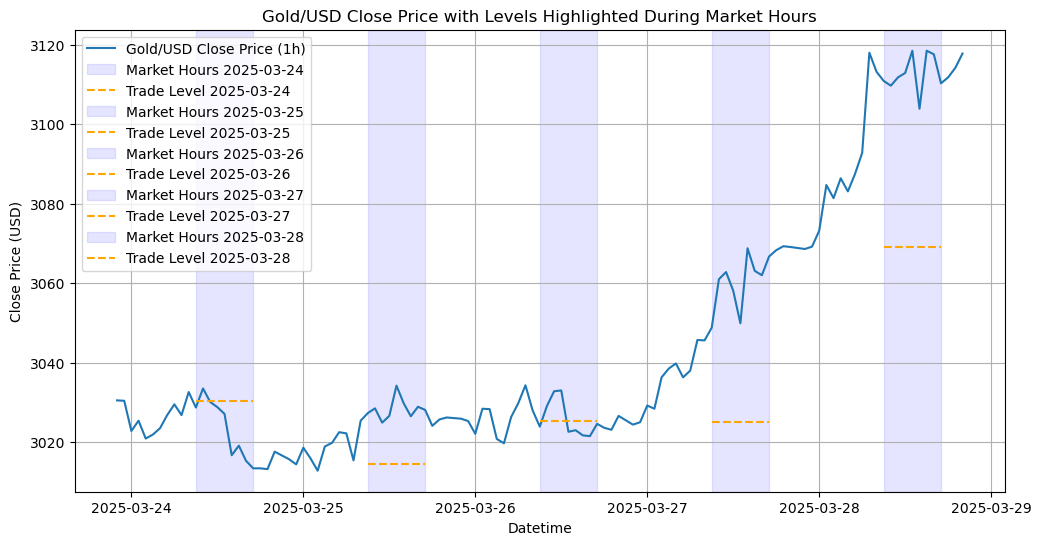

In [56]:
# Plot the close price
plt.figure(figsize=(12, 6))
plt.plot(df_1h.index, df_1h['Close'], label='Gold/USD Close Price (1h)')

# Highlight the levels only during market hours
for date, level in day_levels.items():
    plt.axvspan(level['open_time'], level['close_time'], color='blue', alpha=0.1, label=f"Market Hours {date}")
    plt.hlines(y=level['trade_level'], xmin=level['open_time'], xmax=level['close_time'], color='orange', linestyle='--', label=f"Trade Level {date}")

# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Close Price (USD)')
plt.title('Gold/USD Close Price with Levels Highlighted During Market Hours')
plt.legend()
plt.grid()
plt.show()

2025-03-26 17:00:00+00:00
Executing trade...


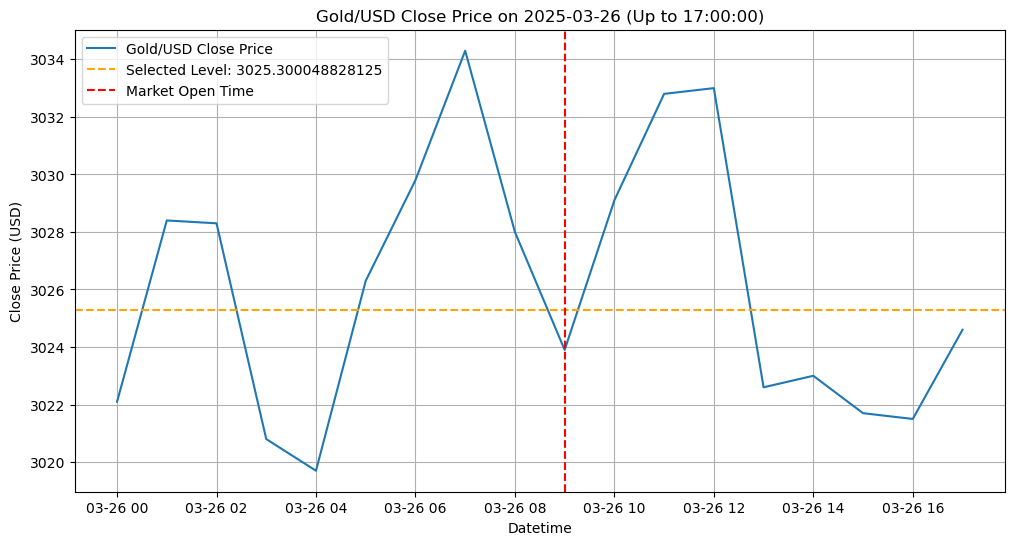

In [57]:
# Define the date and working hours
working_date = pd.Timestamp('2025-03-26').date()
open_time = day_levels[working_date]['open_time']
level = day_levels[working_date]['trade_level']
close_time = day_levels[working_date]['close_time']

# Ensure timezone consistency
open_time = open_time.tz_localize('UTC')
close_time = close_time.tz_localize('UTC')

# trade simulator
current_time = open_time
while current_time <= close_time:
    print(current_time)
    # Simulate the price movement
    # Filter the data for the specific date and up to the current time
    daily_prices = df_1h[(df_1h.index.date == working_date) & (df_1h.index <= current_time)]


    do_trade()

    # Plot the price chart for the selected day up to the current time
    plt.figure(figsize=(12, 6))
    plt.plot(daily_prices.index, daily_prices[('Close', symbol)], label='Gold/USD Close Price')
    plt.axhline(y=level, color='orange', linestyle='--', label=f'Selected Level: {level}')
    plt.axvline(x=open_time, color='red', linestyle='--', label='Market Open Time')
    plt.xlabel('Datetime')
    plt.ylabel('Close Price (USD)')
    plt.title(f'Gold/USD Close Price on {working_date} (Up to {current_time.time()})')
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(1)  # Simulate a delay for each hour
    # Clear the console
    clear_output(wait=True)
    
    # next cycle
    current_time += timedelta(hours=1)